## Steps:
- Importing Libraries
- Importing Data
- EDA
- Visualisation
- Data Preprocssing
- cleaning the Test Data set
- Data Preparation
- Model Building
- Making Prediction
- Model Evaluation
- Interpretaion
- Model Deployment
- Interview Question

# Importing Libraries

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
sns.set_theme(style='darkgrid',palette = 'rainbow')
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [114]:
td = pd.read_csv('Titanic_train.csv')
td

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA

In [115]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
td.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [117]:
td.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [118]:
td.shape

(891, 12)

# Visualisation

<Figure size 3000x2500 with 0 Axes>

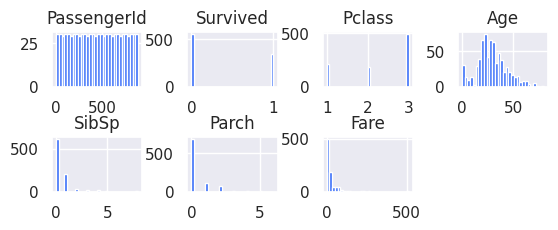

In [119]:
# Histogram

plt.figure(figsize=(30,25))
plt.tight_layout()
td.hist(layout=(4,4),bins=30)
plt.subplots_adjust(hspace = 0.9,wspace = 0.5)
plt.show()

Text(0.5, 1.0, 'Titanic')

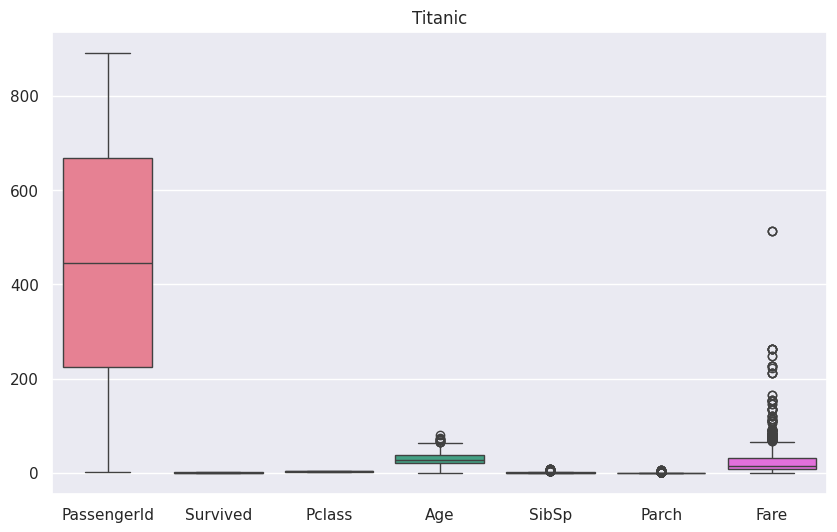

In [120]:
# Boxplot

plt.figure(figsize=(10,6))
sns.boxplot(td)
plt.title("Titanic")

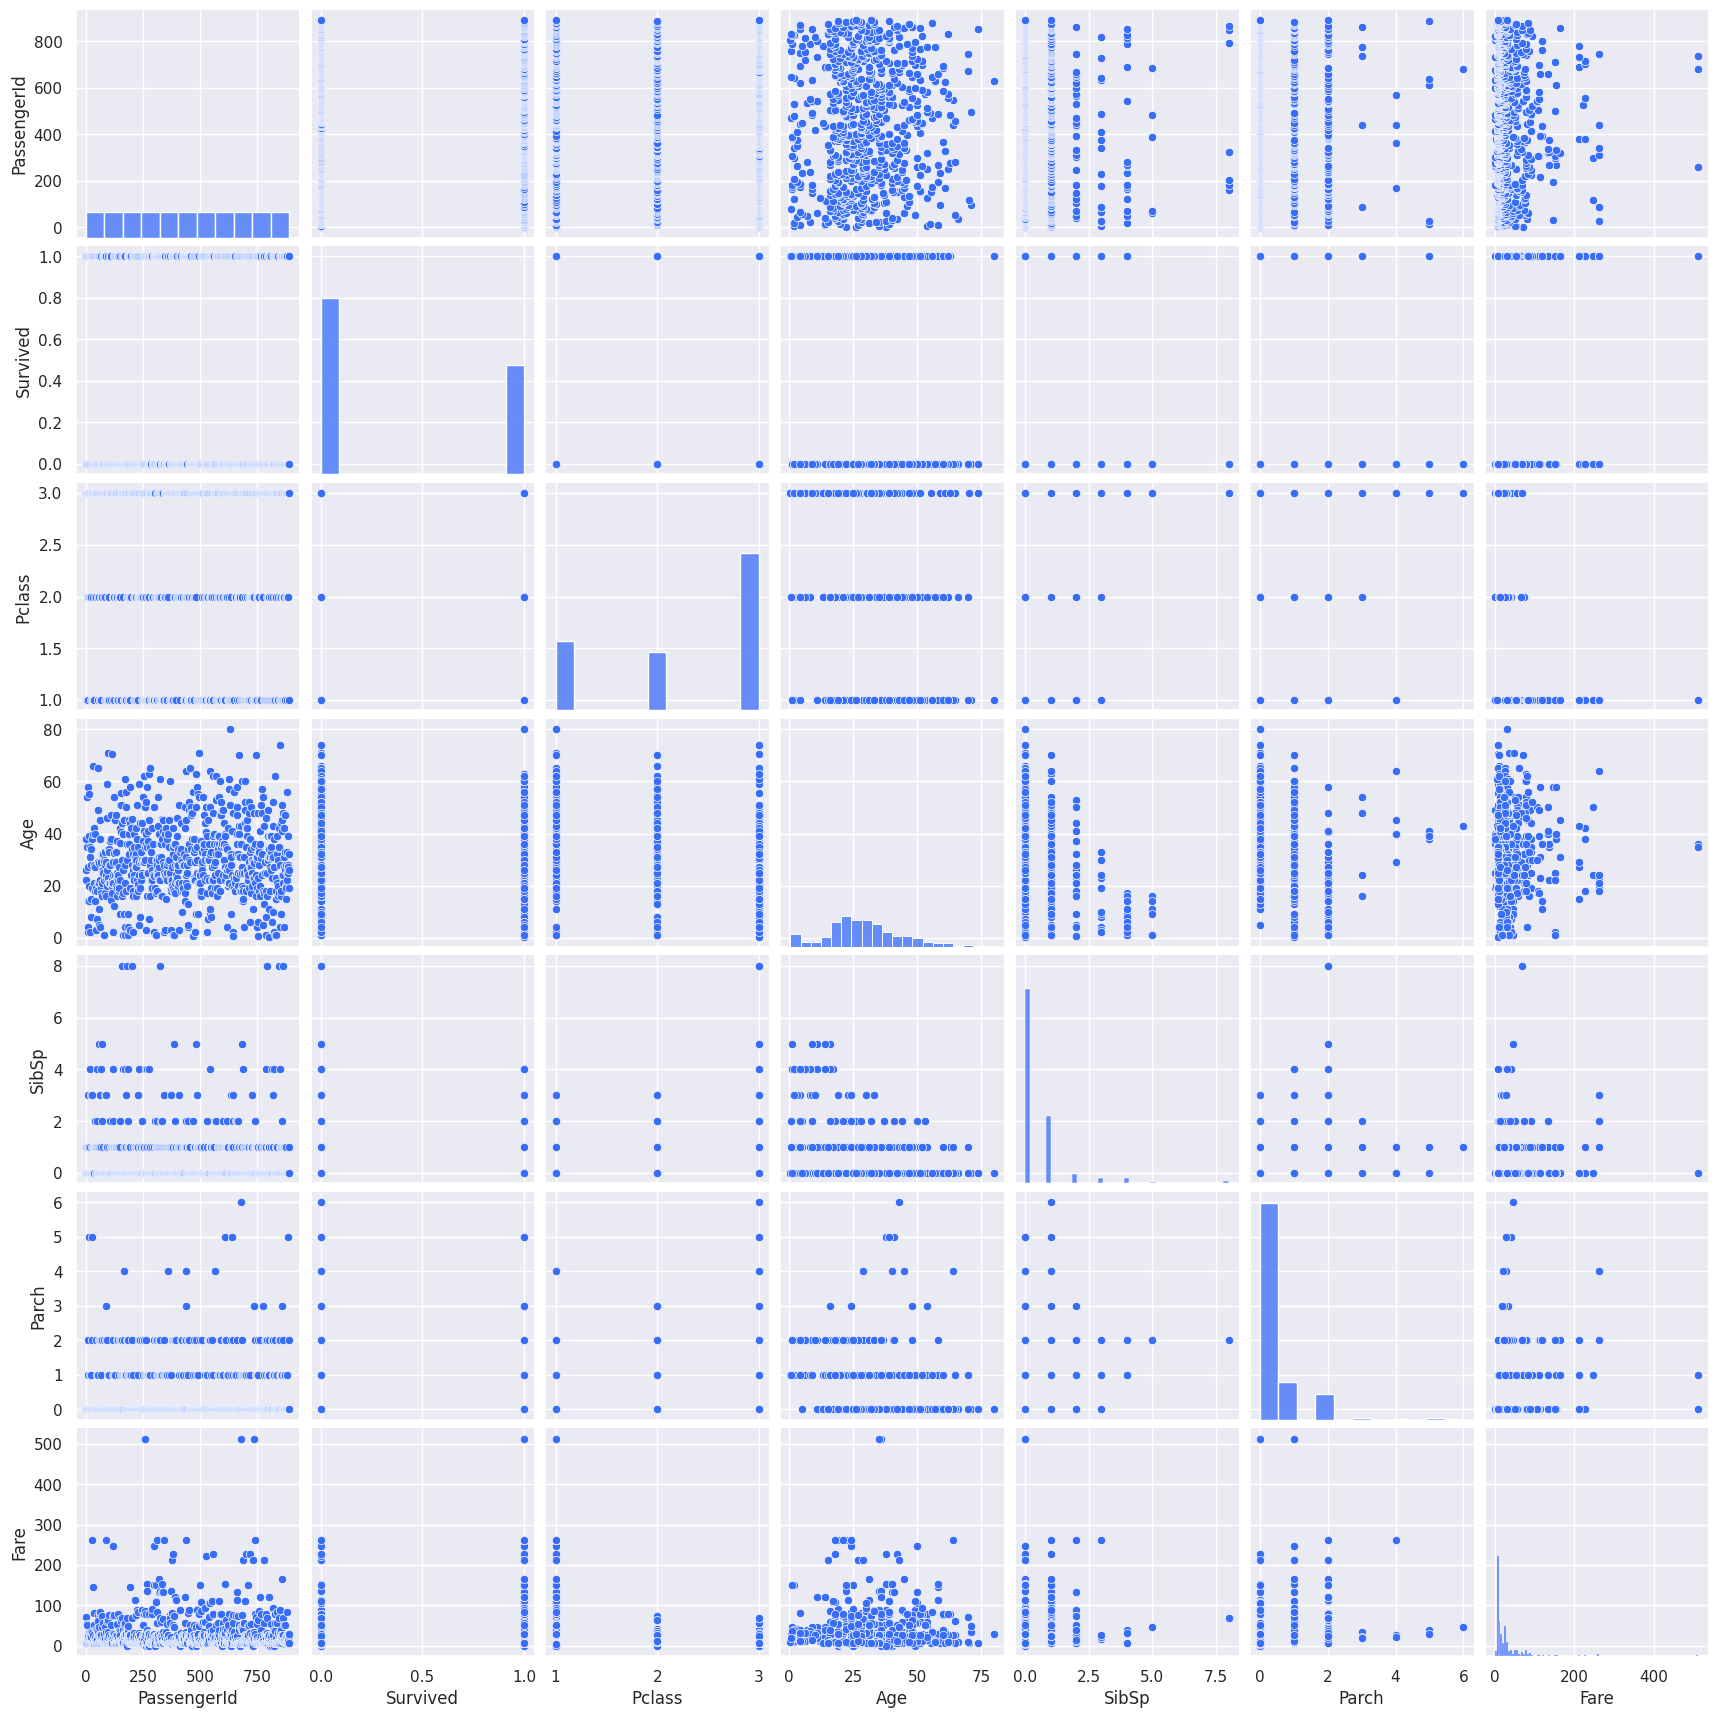

In [121]:
# Pairplot

sns.pairplot(td)

# Data Preprocssing

- As we saw earlier there are few columns that are missing some data. We need to clean our dataset before we begin to train our logistic regression model. Lets first try and fill in the missing age values. I'm going to do this by filling in the missing age with the mean age of the passenger class that the passenger belongs to.

In [122]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
# checking for null values
td.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [124]:
# as we can see that there are too many null values in Age columns so replacing it with mean.

td['Age'] = td['Age'].fillna(td['Age'].mean())

In [125]:
# checking the null values

td.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [126]:
# Now Dropping Unwanted Columns

td.drop(columns=['Cabin'],inplace=True)


In [127]:
from sklearn.preprocessing import LabelEncoder

In [128]:
# Label Encoder
encoder=LabelEncoder()
for columns in td.columns:
    td[columns]=encoder.fit_transform(td[columns])

In [129]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,0,2,108,1,28,1,0,523,18,2
1,1,1,0,190,0,52,1,0,596,207,0
2,2,1,2,353,0,34,0,0,669,41,2
3,3,1,0,272,0,48,1,0,49,189,2
4,4,0,2,15,1,48,0,0,472,43,2


In [130]:
# converting object

#td = pd.get_dummies(td,columns=['Sex','Embarked'],dtype=int)
#td

# Now cleaning the Test Data set

In [131]:


ted = pd.read_csv('Titanic_test.csv')
ted

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [132]:
# checking for null values
ted.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [133]:
# as we can see that there are too many null values in Age columns so replacing it with mean.

ted['Age'] = ted['Age'].fillna(ted['Age'].mean())
ted

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


In [134]:
# Now Dropping Unwanted Columns

ted.drop(columns=['Cabin'],inplace=True)
ted.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [135]:
# Label Encoder
encoder=LabelEncoder()
for columns in ted.columns:
    ted[columns]=encoder.fit_transform(ted[columns])

In [136]:
# converting object

ted = pd.get_dummies(ted,columns=['Sex','Embarked'],dtype=int)
ted.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
0,0,2,206,45,0,0,152,24,0,1,0,1,0
1,1,2,403,61,1,0,221,5,1,0,0,0,1
2,2,1,269,75,0,0,73,41,0,1,0,1,0
3,3,2,408,34,0,0,147,34,0,1,0,0,1
4,4,2,178,27,1,1,138,46,1,0,0,0,1


# Data Preparation

In [137]:
x = td.drop('Survived',axis=1)
y = td['Survived']

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

# Model Building

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
logomodel = LogisticRegression()
logomodel.fit(xtrain,ytrain)

LogisticRegression()

In [144]:
logomodel.score(xtrain,ytrain)

0.8047752808988764

In [145]:
logomodel.score(xtest,ytest)

0.7597765363128491

# Making Prediction

In [146]:
predictions = logomodel.predict(xtest)

In [147]:
final_prediction = pd.DataFrame({'PassengerId':xtest['PassengerId'],'Survived':predictions})

In [148]:
final_prediction

,PassengerId,Survived
862,862,1
223,223,0
84,84,1
680,680,1
535,535,1
...,...,...
796,796,1
815,815,0
629,629,0
421,421,0


# Model Evaluation

In [149]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [150]:
y_predict_train=logomodel.predict(xtrain)

In [151]:
accuracy_score=accuracy_score(ytrain,y_predict_train)

In [152]:
y_predict_test=logomodel.predict(xtest)

In [153]:
# Printing Acuraccy Score

print(accuracy_score)

0.8047752808988764


In [154]:
confusion_matrix(ytrain,y_predict_train)

array([[388,  55],
       [ 84, 185]])

<Axes: >

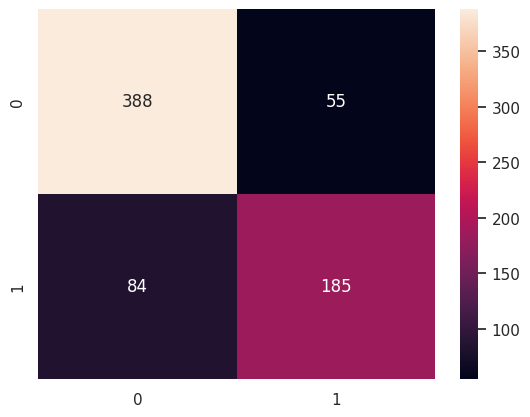

In [155]:
sns.heatmap(confusion_matrix(ytrain,y_predict_train), annot=True,fmt='g')

In [156]:
print(classification_report(ytrain,y_predict_train))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       443
           1       0.77      0.69      0.73       269

    accuracy                           0.80       712
   macro avg       0.80      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712



In [157]:
ytest

,Survived
862,1
223,0
84,1
680,0
535,1
...,...
796,1
815,0
629,0
421,0


In [158]:
y_predict_test=logomodel.predict(xtest)


In [159]:
#accuracy_score=accuracy_score(Y_test,y_predict_test)


In [160]:
confusion_matrix(ytest,y_predict_test)

array([[90, 16],
       [27, 46]])

<Axes: >

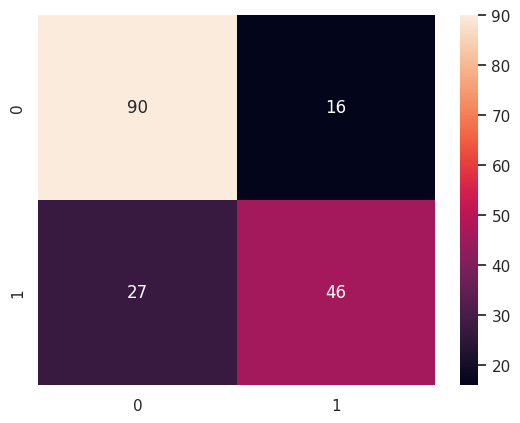

In [161]:
sns.heatmap(confusion_matrix(ytest,y_predict_test), annot=True,fmt='g')

In [162]:
print(accuracy_score)

0.8047752808988764


In [163]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [164]:
logomodel = LogisticRegression()
logomodel.fit(xtrain, ytrain)

LogisticRegression()

In [165]:
y_pred = logomodel.predict(xtest)

In [166]:
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)

In [167]:
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.74
Recall: 0.63
F1 Score: 0.68


In [168]:
# roc-receiver oprating charactristics  auc-area under the curve
from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y,logomodel.predict_proba (x)[:,1])

auc = roc_auc_score(ytrain,y_predict_train)


In [169]:
auc

np.float64(0.7817894215680514)

Text(0, 0.5, 'True Positive Rate')

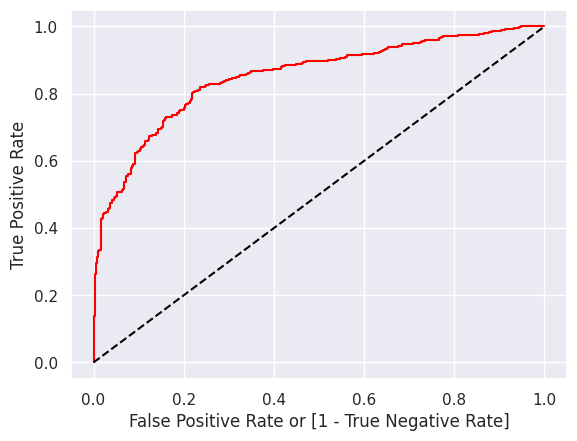

In [170]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [171]:
coafficiants = logomodel.coef_[0] # Coafficiants for features

intercept = logomodel.intercept_[0]

# Interpretaion

In [172]:
coefficients = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': logomodel.coef_[0],
    'Odds Ratio': [round(np.exp(coef), 2) for coef in logomodel.coef_[0]]
})
print(coefficients)

       Feature  Coefficient  Odds Ratio
0  PassengerId     0.001002        1.00
1       Pclass    -0.117644        0.89
2         Name    -0.000207        1.00
3          Sex    -2.477039        0.08
4          Age    -0.016606        0.98
5        SibSp    -0.550075        0.58
6        Parch    -0.247752        0.78
7       Ticket    -0.000310        1.00
8         Fare     0.012258        1.01
9     Embarked    -0.099632        0.91


# Model Deployment

In [173]:
#! pip install streamlit

In [174]:
import pickle
import streamlit as st

In [176]:
from pickle import dump

In [177]:
dump(logomodel,open('logomodel.pkl','wb')) #Serailisation

In [178]:
from pickle import load

In [179]:
loaded_model = load(open('logomodel.pkl','rb')) #Deseralisaion

In [180]:
loaded_model.predict(xtest)

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1])

In [181]:
# Load the trained model
with open('logomodel.pkl', 'rb') as f:
    model = pickle.load(f)

# Streamlit app
st.title("Logistic Regression Predictor")
st.write("Provide input values to predict the outcome.")

# Collect user inputs
input1 = st.number_input("Input feature 1:")
input2 = st.number_input("Input feature 2:")
input3 = st.number_input("Input feature 3:")

# Make predictions
if st.button("Predict"):
    input_data = np.array([[input1, input2, input3]])
    prediction = model.predict(input_data)
    st.write(f"Predicted Outcome: {prediction[0]}")

2025-08-21 15:40:51.966 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-21 15:40:51.967 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-21 15:40:51.968 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-21 15:40:51.969 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-21 15:40:51.970 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-21 15:40:51.971 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-21 15:40:51.972 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-21 15:40:51.973 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [182]:
%%writefile app.py
import streamlit as st
st.title("Test Streamlit App")
st.write("This is a simple app to verify Streamlit setup.")

Overwriting app.py


In [183]:
!stremlit run app.py

/bin/bash: line 1: stremlit: command not found


# Interview Qustions
## 1.What is the difference between precision and recall?
- Precision and Recall are two important metrics used to evaluate the performance of classification models: Precision answers the question: "Of all the positive predictions made by the model, how many are actually correct?" For example, if a model predicts 10 emails as spam but only 6 are truly spam, the precision is 60%. It focuses on avoiding false alarms (false positives). This is useful when making a wrong positive prediction is costly, like flagging important emails as spam.
- Recall answers the question: "Of all the actual positive cases, how many did the model correctly identify?" For example, if there are 10 spam emails and the model only identifies 7 of them as spam, the recall is 70%. It focuses on not missing any true cases (false negatives). This is critical in situations like detecting diseases where missing a case can have serious consequences.

## 2.What is cross-validation, and why is it important in binary classification?
- Cross-validation is a technique used to evaluate the performance of a model by splitting the data into multiple subsets and training/testing the model on different combinations of these subsets.
- Prevents Overfitting: By training and testing the model on different subsets, cross-validation ensures the model doesn’t memorize the training data but learns general patterns.
- Estimates Model Performance: It helps assess how the model will perform on unseen data by evaluating it on multiple splits of the dataset.
- Handles Imbalanced Data: In binary classification, where one class may be underrepresented, cross-validation helps in understanding model performance across different class distributions.
- Reduces Bias: Cross-validation gives a more robust estimate of model performance by reducing the variability that may occur if the model is trained/tested on a single split of data.